#### Extraction code logic for all Shapefile Files

In [16]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import io
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse


coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.use('agg')
# mpl.rcParams['savefig.pad_inches'] = 0


# I have manually processed every file using this format

In [2]:
gdf = gpd.read_file("D:/Users/xubil/OneDrive/Documents/Wildfires Data/canards_sauv_mhnb_2008_s_poly/canards_sauv_mhnb_2008_s_poly.shp") # Path to the shapefile 

In [3]:
gdf = gdf.to_crs(4326)

### Plot Generation

Processing item  Marécage arbustif


d:\Users\xubil\OneDrive\Documents\Programming\VS_Code_Workspace\Python\Wildfires\Extract\get_plot.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=0, rect=(0,0,0,0))


Processing item  Marécage inondé
Processing item  Herbaçaie


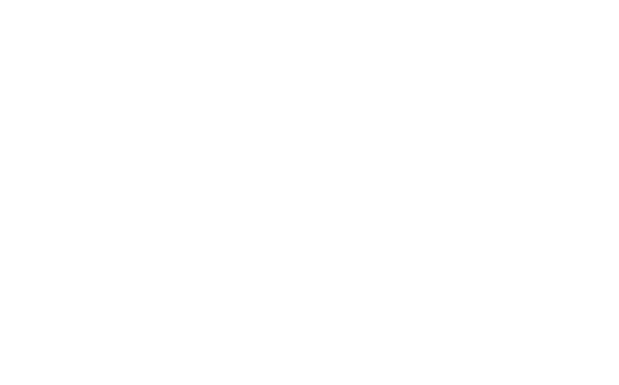

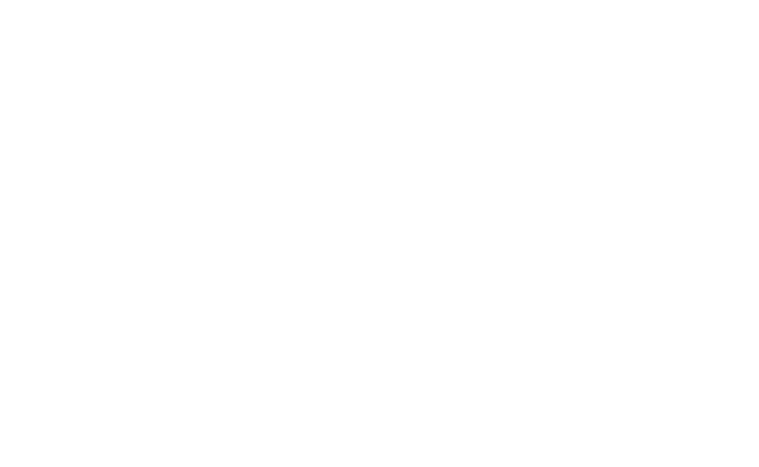

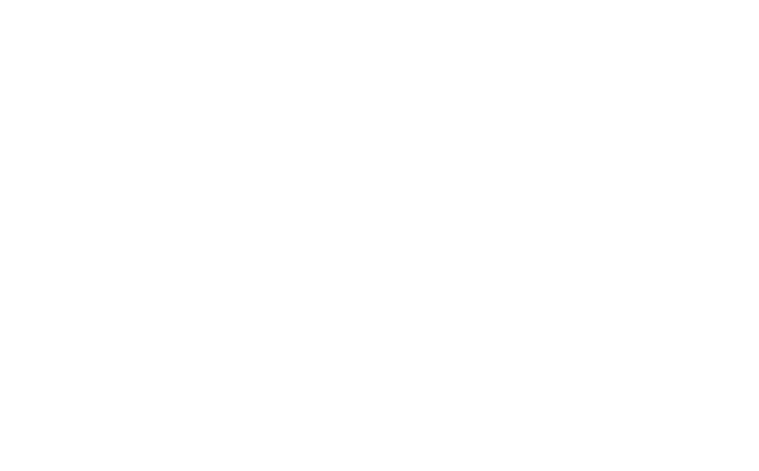

In [4]:
plots,titles = get_plot(gdf, "classe", "white") # The second parameter, "type" is changed depending on the Unique class's name we are extracting

### Define Limits

In [84]:
target_limit =  "limits_4326" #"limits_testing_9_chunks"
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

'''
where new_image is a figure.canvas.buffer_rgba() turned into a np matrix: 

nonzero_rows, nonzero_cols = np.nonzero(new_image) # Get all nonzero rows & collumns 

min_row, max_row = np.min(nonzero_rows), np.max(nonzero_rows)
min_col, max_col = np.min(nonzero_cols), np.max(nonzero_cols)
# After a series of test, (0, 575, 3, 764) was the exact fit of the canvas when the ration between width:height = 2:1

'''

min_row, max_row, min_col, max_col = 0, 575, 3, 764 
xyratio = 2/1

resx = 0.2
resy = resx/xyratio
n_chunkx = int(round((xmax-xmin)/resx, 1)) # MAKE SURE YOU CAN MATH: because we convert to int if you get 0.1232131 sketch 
n_chunky = int(round((ymax-ymin)/resy, 1)) # We're using round to not get like 2.9999999999999999997 make sure to get 0.3

# For Final Extraction: 
# x: 19.8/99 = 0.2 per chunk for 99 chunks
# y: 8/80 = 0.1 per chunk for 80 chunks

In [83]:
n_chunkx, n_chunky

(99, 80)

### Process by chunks

In [88]:
for item_idx in range(len(plots)):
    # Declare sparse matrix with a defined width, so we can concat later on axis = 0
    smat_item = sparse.csr_matrix((0, (max_col-min_col+1)*n_chunky)) 

    plots[item_idx][0].tight_layout(pad=0, rect=(0,0,0,0))

    for x_idx in range(n_chunkx):
        # Similarly, declare a sparse matrix with a defined height for easier concat on axis = 1
        smat_chunk_row = sparse.csr_matrix((max_row-min_row+1, 0))

        for y_idx in range(n_chunky):
            plots[item_idx][1].axis([
                round(xmin+(x_idx)*resx, 1),
                round(xmin+(x_idx+1)*resx, 1), # We don't want to get .00000000000000000000001 it's gonna ruin the perfect allignment,
                round(ymin+(y_idx)*resy, 1),
                round(ymin+(y_idx+1)*resy, 1)
            ])

            print(round(xmin+(x_idx)*resx, 1),
                round(xmin+(x_idx+1)*resx, 1),
                round(ymin+(y_idx)*resy, 1),
                round(ymin+(y_idx+1)*resy, 1))
            
            plots[item_idx][0].canvas.draw()
            data = np.frombuffer(plots[item_idx][0].canvas.buffer_rgba(), dtype=np.uint8)
            image = data.reshape(plots[item_idx][0].canvas.get_width_height()[::-1] + (4,)) # Get the 3d array of the chunk
            new_image = np.round(np.squeeze(image[:, :, 3:])/255.0, 3)[:, min_col:max_col+1] # Convert to matrix & get relevant area only

            # print(new_image.shape)

            smat_chunk_row = sparse.hstack((smat_chunk_row, sparse.csr_matrix(new_image)))
            del data, image, new_image # Save memory 
        
        # print(smat_chunk_row.shape, smat_item.shape)

        smat_item = sparse.vstack((smat_chunk_row, smat_item))
        del smat_chunk_row

    sparse.save_npz("data-sample/"+titles[item_idx]+".npz", smat_item) # Save the sparse matrix
    del smat_item # Free Up Memory
            

-80.4 -80.2 44.6 44.7
-80.4 -80.2 44.7 44.8
-80.4 -80.2 44.8 44.9
-80.4 -80.2 44.9 45.0
-80.4 -80.2 45.0 45.1
-80.4 -80.2 45.1 45.2
-80.4 -80.2 45.2 45.3
-80.4 -80.2 45.3 45.4
-80.4 -80.2 45.4 45.5
-80.4 -80.2 45.5 45.6
-80.4 -80.2 45.6 45.7
-80.4 -80.2 45.7 45.8
-80.4 -80.2 45.8 45.9
-80.4 -80.2 45.9 46.0
-80.4 -80.2 46.0 46.1
-80.4 -80.2 46.1 46.2
-80.4 -80.2 46.2 46.3
-80.4 -80.2 46.3 46.4
-80.4 -80.2 46.4 46.5
-80.4 -80.2 46.5 46.6
-80.4 -80.2 46.6 46.7
-80.4 -80.2 46.7 46.8
-80.4 -80.2 46.8 46.9
-80.4 -80.2 46.9 47.0
-80.4 -80.2 47.0 47.1
-80.4 -80.2 47.1 47.2
-80.4 -80.2 47.2 47.3
-80.4 -80.2 47.3 47.4
-80.4 -80.2 47.4 47.5
-80.4 -80.2 47.5 47.6
-80.4 -80.2 47.6 47.7
-80.4 -80.2 47.7 47.8
-80.4 -80.2 47.8 47.9
-80.4 -80.2 47.9 48.0
-80.4 -80.2 48.0 48.1
-80.4 -80.2 48.1 48.2
-80.4 -80.2 48.2 48.3
-80.4 -80.2 48.3 48.4
-80.4 -80.2 48.4 48.5
-80.4 -80.2 48.5 48.6
-80.4 -80.2 48.6 48.7
-80.4 -80.2 48.7 48.8
-80.4 -80.2 48.8 48.9
-80.4 -80.2 48.9 49.0
-80.4 -80.2 49.0 49.1
-80.4 -80.

KeyboardInterrupt: 

In [38]:
a = sparse.load_npz("data-sample/Herbaçaie.npz")


In [41]:
a = a.todense()

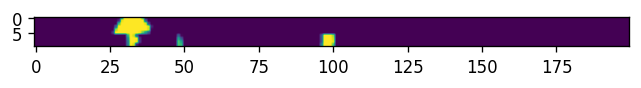

In [44]:
plt.imshow(a[570:580, 200:400])

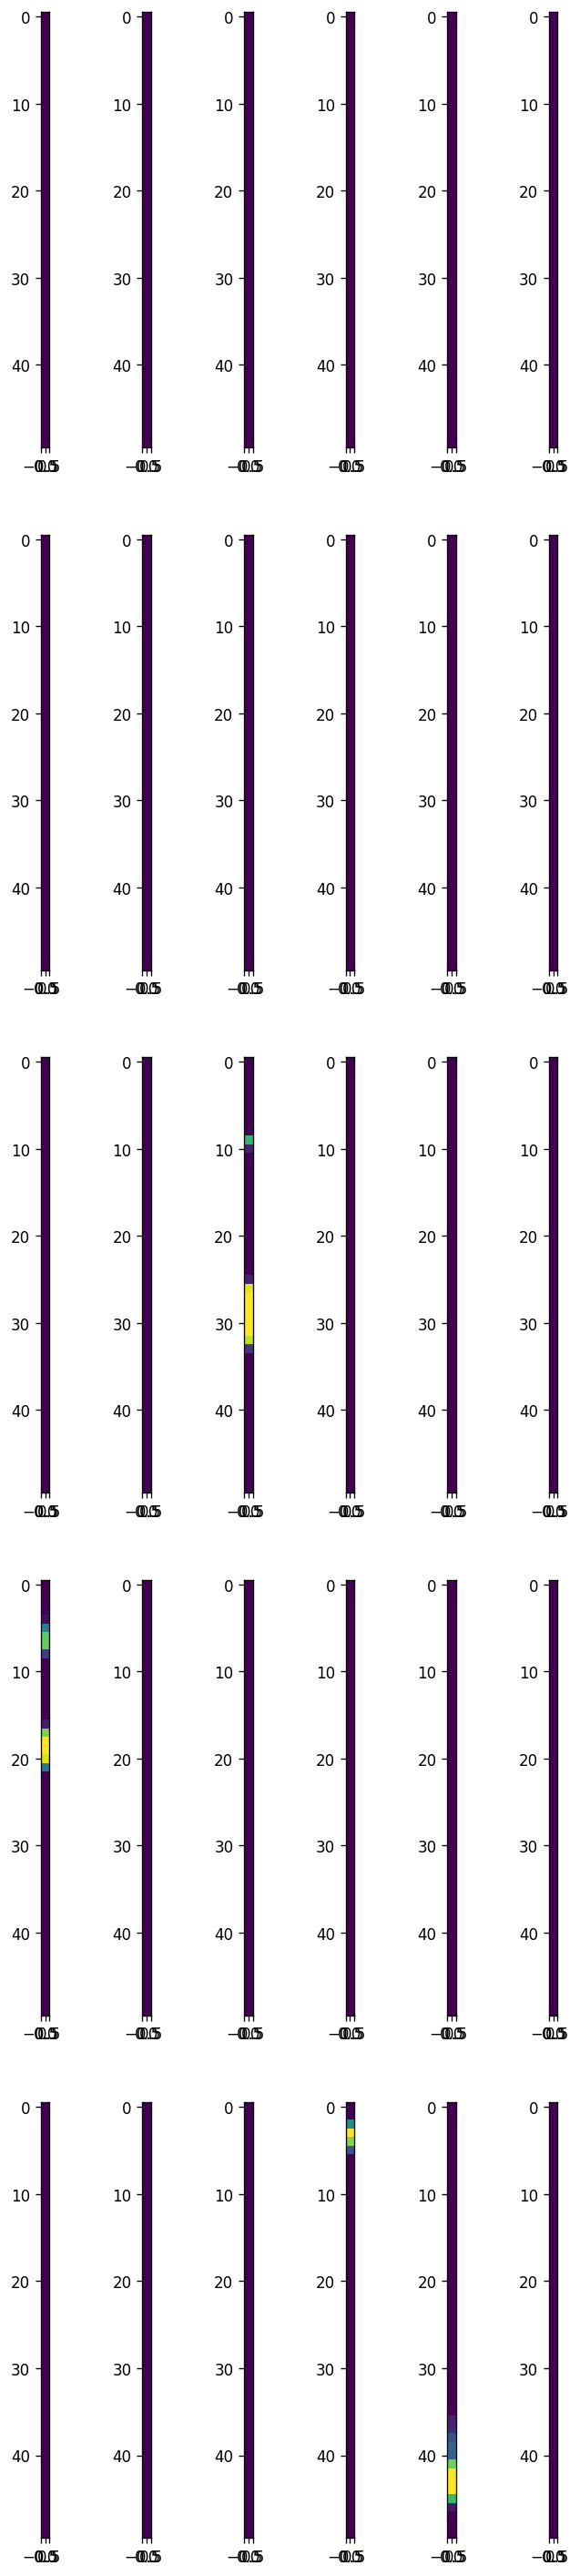

In [81]:
fig, axs = plt.subplots(5, 6, figsize=(7, 30))

curr_r = 0

for i in range(0, 30):
    if (curr_r == 0):
        test = i
    else:
        test = (i%(curr_r*6))

    # print(test)

    axs[curr_r, test].imshow(a[50*i:50*(i+1), 1524:1525])
    
    if (test == 5):
        curr_r+=1

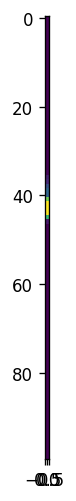

In [61]:
plt.imshow(a[1400:1500, 1524:1525])

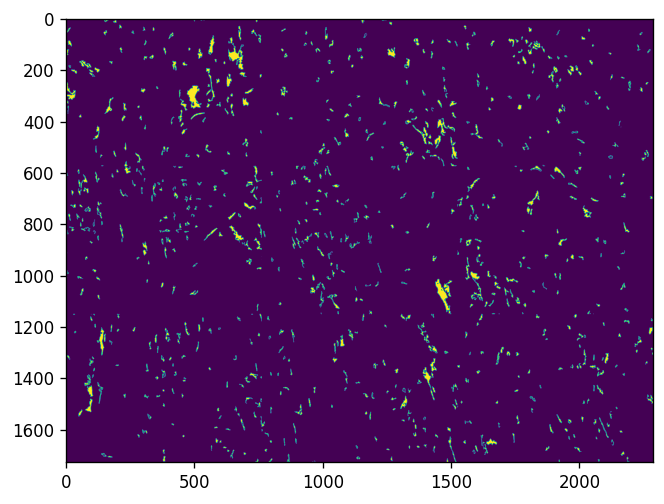

In [45]:
plt.imshow(a)

In [67]:
a.shape

(1728, 2286)

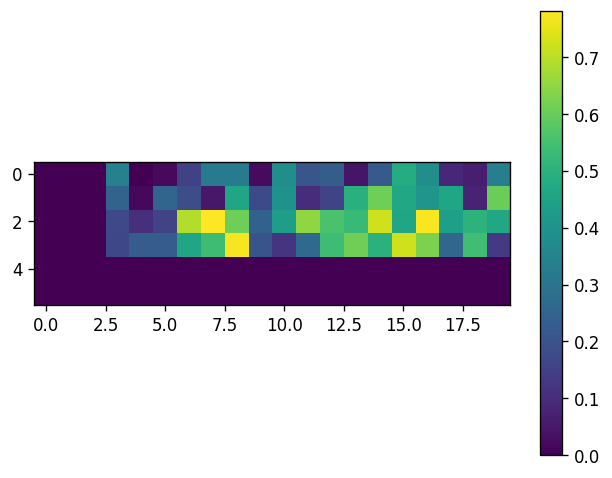

In [109]:
plt.imshow(a[360:366, 80:100])
plt.colorbar()
plt.show()